In [1]:
# %pip install matplotlib_venn

In [2]:
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

airtb=pd.read_csv("./airtb.csv")
geodb=pd.read_csv("./geodb.csv")
s123=pd.read_csv("./s123.csv")

1.	photo_date: Date of Observation (but only the date, DO NOT USE the time in that entry)
2.	photo_time: Time of Observation
3.	Image1: (Global ID?)
4.	guessSource: What caused the flooding?
5.	guessCause: Which of the following were flooded?
6.	Post_comment: Additional Comments
7.	Est_depth: How deep is the flood water (in inches)? (this wasn’t included in the last upload)
8.	Location_longtitude: x
9.	Location_latitude: y


## Method 1 (using `geodb`):

In [3]:
geodb.columns

Index(['ObjectID', 'GlobalID', 'CreationDate', 'Creator', 'EditDate', 'Editor',
       'Which of the following were flooded? ',
       'Other - Which of the following were flooded? ',
       'Please describe the weather conditions during the flooding event.',
       'Other - Please describe the weather conditions during the flooding event.',
       'Additional Comments', 'Contact Information',
       'How deep is the flood water (in inches)? ', 'Time of Observation',
       'Date of Observation', 'What caused the flooding? ',
       'Other - What caused the flooding? ',
       'Is the location flooded at the time of the report? ',
       'May we contact you? ', 'Neighborhood and/or Borough ', 'x', 'y'],
      dtype='object')

In [4]:
# EditDate>CreationDate, Use date from `CreationDate` and time from `Time of Observation`(required):

geodb[["Time of Observation","CreationDate","EditDate","Date of Observation"]]

,Time of Observation,CreationDate,EditDate,Date of Observation
0,12:00,5/7/2020 12:12:32 AM,8/20/2021 3:07:38 AM,5/7/2020 12:00:00 AM
1,12:00,5/7/2020 12:15:22 AM,8/20/2021 3:07:38 AM,5/7/2020 12:00:00 AM
2,00:30,5/7/2020 12:35:38 AM,12/6/2021 8:46:09 PM,5/7/2020 12:00:00 AM
3,00:39,5/7/2020 12:41:22 AM,8/20/2021 3:07:38 AM,5/7/2020 12:00:00 AM
4,00:30,5/7/2020 12:46:55 AM,8/20/2021 3:07:38 AM,5/7/2020 12:00:00 AM
...,...,...,...,...
719,09:31,2/21/2023 3:22:28 PM,2/21/2023 3:22:28 PM,2/21/2023 5:00:00 PM
720,21:57,5/1/2023 2:01:04 AM,5/1/2023 2:01:04 AM,4/30/2023 4:00:00 PM
721,18:30,6/9/2023 2:41:17 AM,6/9/2023 2:41:17 AM,6/2/2023 4:00:00 PM
722,21:49,6/13/2023 1:56:10 AM,6/13/2023 1:56:10 AM,6/12/2023 4:00:00 PM


In [5]:
# geodb.loc[1,"Date of Observation"].split(" ")[0]
geodb["Photo_Date"]=geodb["Date of Observation"].str.split(" ").str[0]
geodb["Photo_Time"]=geodb["Time of Observation"]

# guessSource, guessCause:
geodb["Guess_Source"]=geodb["What caused the flooding? "]
geodb["Guess_Cause"]=geodb["Which of the following were flooded? "]

# Post_comment:
geodb["Post_Comment"]=geodb["Additional Comments"]
# est_Depth:
geodb["Est_Depth"]=geodb["How deep is the flood water (in inches)? "]

# long,lat
geodb["Longitude"]=geodb.x
geodb["Latitude"]=geodb.y


In [6]:
df=geodb[["ObjectID","Photo_Date","Photo_Time","Guess_Source","Guess_Cause","Post_Comment","Est_Depth","Longitude","Latitude"]]
df["Photo"]=""
df.head(3)

C:\Users\JselZ\AppData\Local\Temp\ipykernel_18584\4189271042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Photo"]=""


,ObjectID,Photo_Date,Photo_Time,Guess_Source,Guess_Cause,Post_Comment,Est_Depth,Longitude,Latitude,Photo
0,20,5/7/2020,12:00,NaN,property,NaN,NaN,-73.837982,40.657893,
1,21,5/7/2020,12:00,NaN,roads_streets,tide water coming to the street from storm dra...,NaN,-73.837842,40.657755,
2,22,5/7/2020,00:30,Storm_drain_Water_bubbling_up_f,"roads_streets,sidewalks",NaN,NaN,-73.829444,40.653456,


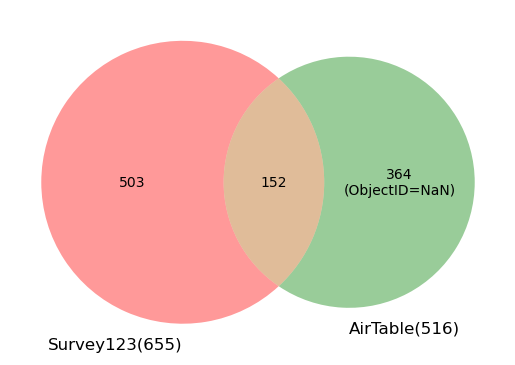

In [7]:
dg=venn2(subsets = (503,364,152), set_labels = ('Survey123(655)', 'AirTable(516)'))
for id in ('10','11','01'):
    dg.get_label_by_id(id).set_text(id)
dg.get_label_by_id('10').set_text("503")
dg.get_label_by_id('11').set_text("152")
dg.get_label_by_id('01').set_text("364\n(ObjectID=NaN)")
plt.show()

In [8]:
len(geodb)

724

In [9]:
len(df)-70

654

In [10]:
# image:
## in `s123`, ObjectID is a primary key (no duplicates)

s123ID=list(s123.ObjectID.unique())
for i in range(len(df)):
    dfID=df.loc[i,"ObjectID"]
    if dfID in s123ID:
        df.loc[i,"Photo"]= s123[s123["ObjectID"]==dfID]["Photo"].values[0]

df.head(3)

,ObjectID,Photo_Date,Photo_Time,Guess_Source,Guess_Cause,Post_Comment,Est_Depth,Longitude,Latitude,Photo
0,20,5/7/2020,12:00,NaN,property,NaN,NaN,-73.837982,40.657893,ATT20_2.jpeg (https://v5.airtableusercontent.c...
1,21,5/7/2020,12:00,NaN,roads_streets,tide water coming to the street from storm dra...,NaN,-73.837842,40.657755,ATT21_3.jpeg (https://v5.airtableusercontent.c...
2,22,5/7/2020,00:30,Storm_drain_Water_bubbling_up_f,"roads_streets,sidewalks",NaN,NaN,-73.829444,40.653456,ATT22_20200506_202850.jpg (https://v5.airtable...


In [11]:
len(df)

724

In [14]:
df.loc[0,"Photo"]

'ATT20_2.jpeg (https://v5.airtableusercontent.com/v3/u/27/27/1712030400000/WhaeklZrowdCwO8Eeid4Ng/ugRncQCxHxbU4DfjSZfgIu-198L-lC-iP7ZijY48o4IkZuFb2uPtJfV8d4fYCikD8zTPZaLc46k0k2FyeKDR1C4T-wxgCQ6jHhPJGDfEWzxE6D2nKwVqQGYIP7klBnfb6x9aSugsAezBnYgfitY-Cg/FMfIFiWhz2TUONyJRSlEAs5_2OfgUVaJ688XyoSY5r8)'

In [11]:
df[df.Photo==""]

,ObjectID,Photo_Date,Photo_Time,Guess_Source,Guess_Cause,Post_Comment,Est_Depth,Longitude,Latitude,Photo
259,293,8/21/2021,21:27,"Overland_flooding_Water_coming_,Rainfall_Water...","roads_streets,sidewalks,parking_lots,property",Heavy rain and thunderstorms night before Hurr...,8.0,-73.817070,40.608924,
655,701,9/1/2021,02:15,NaN,NaN,I couldn't work for 2 days,NaN,-73.908219,40.637997,
656,702,1/1/2022,07:26,Storm_drain_Water_bubbling_up_f,"roads_streets,sidewalks",NaN,6.0,-73.582051,40.779594,
657,703,1/2/2022,07:27,Overland_flooding_Water_coming_,"roads_streets,sidewalks,parking_lots",NaN,8.0,-73.830114,40.653336,
658,704,1/2/2022,07:35,Storm_drain_Water_bubbling_up_f,"roads_streets,sidewalks,property",NaN,8.0,-73.762230,40.595708,
...,...,...,...,...,...,...,...,...,...,...
719,775,2/21/2023,09:31,"Overland_flooding_Water_coming_,Rainfall_Water...","roads_streets,sidewalks,property",Picture taken fro 102nd Street looking down 16...,5.0,-73.831090,40.658700,
720,776,4/30/2023,21:57,"Rainfall_Water_pooling_from_dir,Storm_drain_Wa...",property,NaN,24.0,-73.886160,40.765840,
721,777,6/2/2023,18:30,"Rainfall_Water_pooling_from_dir,Storm_drain_Wa...","roads_streets,sidewalks,property,other",This is located on rutland and Kingston Brookl...,12.0,-73.942715,40.659874,
722,778,6/12/2023,21:49,"Rainfall_Water_pooling_from_dir,Storm_drain_Wa...","roads_streets,property",NaN,4.0,-73.942680,40.659922,


In [39]:
df[df.Photo==""].to_csv("nophoto.csv")

## Still 70 rows with no photo, try to find them from `airtb`:

In [12]:
# ID in airtb is float, convert to int and check:
airtb["S123_Object_ID"]=airtb["S123_Object_ID"].astype("Int64",errors="ignore")
airtb["S123_Object_ID"].unique()

<IntegerArray>
[<NA>,   89,  136,  128,  129,  141,  142,  130,  132,  131,
 ...
  170,  171,  172,  173,  163,  165,  166,  164,  168,  167]
Length: 153, dtype: Int64

In [30]:
for i in df[df.Photo==""].ObjectID.unique():
    if i in airtb.S123_Object_ID.unique():
        print("Yes")
        break

### `airtb` also do not have these ObjectID directly, trying to find match ObjectID by other features from `ObjectID=NaN` columns  

First handle edge cases and do conversion:
- precision of 6 is enough for location

In [14]:
# there is "a" value in airtb.Latitude, handle that:
precision=5
for i in range(len(airtb)):
    try:
        airtb.loc[i,"Latitude"]=round(float(airtb.loc[i,"Latitude"]),precision)
    except:
        airtb.loc[i,"Latitude"]=0.0

    airtb.loc[i,"Longitude"]=round(float(airtb.loc[i,"Longitude"]),precision)

s123["Longitude"]=round(s123["Longitude"],precision)
s123["Latitude"]=round(s123["Latitude"],precision)

for i in range(len(airtb)):
    airtb.loc[i,"Latitude"]=round(float(airtb.loc[i,"Latitude"]),precision)
    airtb.loc[i,"Longitude"]=round(float(airtb.loc[i,"Longitude"]),precision)

df["Longitude"]=round(df["Longitude"],precision)
df["Latitude"]=round(df["Latitude"],precision)

C:\Users\JselZ\AppData\Local\Temp\ipykernel_2116\871065776.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Longitude"]=round(df["Longitude"],precision)
C:\Users\JselZ\AppData\Local\Temp\ipykernel_2116\871065776.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Latitude"]=round(df["Latitude"],precision)


In [15]:
# airtb[type(airtb.loc[1,"S123_Object_ID"])==pd._libs.missing.NAType]
airtb_nanid=airtb[airtb['S123_Object_ID'].isna()]
airtb_nanid

,S123_Object_ID,Date,Address,Neighborhood,Latitude,Longitude,Contact,Event,Source,Approx. Depth,What is affected by the flood waters?,What are additional causes of flooding?,Weather,Additional Comments,May we contact you in the future for any of the following reasons?,Photo
0,<NA>,9/10/2018 09:50,Davenport Court,Howard Beach/ Hamilton Beach,40.6534,-73.83025,B. Kissane,September 2018 New Moon,Overland Flooding,NaN,NaN,NaN,NaN,NaN,NaN,414697~1.JPG (https://v5.airtableusercontent.c...
1,<NA>,9/10/2018 22:35,First Street,Howard Beach/ Hamilton Beach,40.65413,-73.83087,G. Ohringer,September 2018 New Moon,Overland Flooding,NaN,NaN,NaN,NaN,NaN,NaN,First Street; 9_10_2018; Night Tide _ G Ohring...
2,<NA>,9/10/2018 23:35,Davenport Court,Howard Beach/ Hamilton Beach,40.65348,-73.83026,C. O'Dea,September 2018 New Moon,Overland Flooding,NaN,NaN,NaN,NaN,NaN,NaN,Davenport Court _ Charlene O'Dea 1135PM _USED....
3,<NA>,9/10/2018 23:35,Rau Court,Howard Beach/ Hamilton Beach,40.65397,-73.82989,C. O'Dea,September 2018 New Moon,Overland Flooding,NaN,NaN,NaN,NaN,NaN,NaN,Rau Court _ C O'Dea 1135PM.jpg (https://v5.air...
4,<NA>,9/25/2018 09:45,Davenport Court,Howard Beach/ Hamilton Beach,40.65346,-73.82991,C. O'Dea,September 2018 New Moon,Overland Flooding,NaN,NaN,NaN,NaN,NaN,NaN,"""Davenport Court, Tuesday morning at 9_45 Sept..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,<NA>,7/11/2020 12:44,W35th Street and Mermaid,Coney Island,40.57707,-74.00179,K. Shirayanagi,Tropical Storm Fay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,image2.JPG (https://v5.airtableusercontent.com...
394,<NA>,7/11/2020 12:46,W35th Street and Neptune,Coney Island,40.57714,-74.00126,K. Shirayanagi,Tropical Storm Fay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,image3.JPG (https://v5.airtableusercontent.com...
395,<NA>,7/11/2020 13:02,W24th Street and Neptune,Coney Island,40.57782,-73.99150,K. Shirayanagi,Tropical Storm Fay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,image4.JPG (https://v5.airtableusercontent.com...
396,<NA>,7/11/2020 13:12,W16th and Neptune,Coney Island,40.57895,-73.98415,K. Shirayanagi,Tropical Storm Fay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,image5.JPG (https://v5.airtableusercontent.com...


In [34]:
s123

,ObjectID,Date and Time of Observation,How deep is the flood water (in inches)?,Contact Information,May we contact you?,Photo,Neighborhood,Longitude,Latitude,xycombined,timexycombined
0,700,12/5/2021 08:46,4.0,THIMBLE131@AOL.COM,Yes,ATT1009_16387119951971884772446874806523.jpg (...,FAR ROCKAWAY,-73.58210,40.77959,40.77959|-73.5821,12/5/2021 08:46|40.77959|-73.5821
1,699,11/30/2021 14:15,NaN,NaN,No,NaN,NaN,-74.01910,40.74174,40.74174|-74.0191,11/30/2021 14:15|40.74174|-74.0191
2,698,11/7/2021 09:25,4.0,Hamilton Beach/Howard Beach High Tide Pictures...,Yes,ATT1008_254534471_114655884348293_473763957397...,"Hamilton Beach, Queens",-73.83010,40.65142,40.65142|-73.8301,11/7/2021 09:25|40.65142|-73.8301
3,671,11/6/2021 10:07,6.0,THIMBLE131@AOL.COM,Yes,ATT965_16362076825352856427356178625912.jpg (h...,NaN,-73.76200,40.59593,40.59593|-73.762,11/6/2021 10:07|40.59593|-73.762
4,670,11/6/2021 09:58,6.0,THIMBLE131@AOL.COM,Yes,ATT964_16362071372283272574354267715384.jpg (h...,NaN,-73.75500,40.59563,40.59563|-73.755,11/6/2021 09:58|40.59563|-73.755
...,...,...,...,...,...,...,...,...,...,...,...
650,653,9/25/2018 09:45,NaN,C. O'Dea,NaN,"""Davenport Court, Tuesday morning at 9_45 Sept...",NaN,-73.82991,40.65346,40.65346|-73.82991,9/25/2018 09:45|40.65346|-73.82991
651,655,9/10/2018 23:35,NaN,C. O'Dea,NaN,Rau Court _ C O'Dea 1135PM.jpg (https://v5.air...,NaN,-73.82989,40.65397,40.65397|-73.82989,9/10/2018 23:35|40.65397|-73.82989
652,654,9/10/2018 23:35,NaN,C. O'Dea,NaN,Davenport Court _ Charlene O'Dea 1135PM _USED....,NaN,-73.83026,40.65348,40.65348|-73.83026,9/10/2018 23:35|40.65348|-73.83026
653,656,9/10/2018 22:35,NaN,G. Ohringer,NaN,First Street; 9_10_2018; Night Tide _ G Ohring...,NaN,-73.83087,40.65413,40.65413|-73.83087,9/10/2018 22:35|40.65413|-73.83087


### matching objectID in geodb w/o photoID to airtb(w/o ObjectID) by longitude and latitude

In [16]:
for i in list(df[df.Photo==""]["ObjectID"]):
    dflat=df[df["ObjectID"]==i]["Latitude"].values[0]
    dflong=df[df["ObjectID"]==i]["Longitude"].values[0]
    
    if len(airtb_nanid[(airtb_nanid.Latitude==dflat) ])>0 and len(airtb_nanid[(airtb_nanid.Longitude==dflong) ])>0:
        # print("yes")
        print(airtb_nanid[(airtb_nanid.Latitude==dflat)& (airtb_nanid.Longitude==dflong)])
    
# nope

Empty DataFrame
Columns: [S123_Object_ID, Date, Address, Neighborhood, Latitude, Longitude, Contact, Event, Source, Approx. Depth, What is affected by the flood waters?, What are additional causes of flooding?, Weather, Additional Comments, May we contact you in the future for any of the following reasons? , Photo]
Index: []
Empty DataFrame
Columns: [S123_Object_ID, Date, Address, Neighborhood, Latitude, Longitude, Contact, Event, Source, Approx. Depth, What is affected by the flood waters?, What are additional causes of flooding?, Weather, Additional Comments, May we contact you in the future for any of the following reasons? , Photo]
Index: []
Empty DataFrame
Columns: [S123_Object_ID, Date, Address, Neighborhood, Latitude, Longitude, Contact, Event, Source, Approx. Depth, What is affected by the flood waters?, What are additional causes of flooding?, Weather, Additional Comments, May we contact you in the future for any of the following reasons? , Photo]
Index: []
Empty DataFrame
Col

### matching objectIDs in geodb w/o photoID by two dates in airtb(w/o ObjectID)

In [17]:
geodb_nopid=geodb[geodb['ObjectID'].isin(df[df.Photo==""]["ObjectID"])]
for i in list(airtb_nanid.Date):
    thisdate=i.split(" ")[0]
    if len(geodb_nopid[geodb_nopid["CreationDate"].str.split(" ").str[0]==thisdate])>0 or len(geodb_nopid[geodb_nopid["EditDate"].str.split(" ").str[0]==thisdate])>0:
        print(i)

# nope

In [18]:
# merged_df["S123_Object_ID"]=merged_df["S123_Object_ID"].astype("Int64",errors="ignore")
# merged_df[merged_df["S123_Object_ID"]==merged_df["ObjectID"]]

# Method2: `airtb`+`s123`:

In [19]:
s123["xycombined"]= s123['Latitude'].astype(str) + '|' + s123['Longitude'].astype(str)
s123["timexycombined"]= s123['Date and Time of Observation'].astype(str) +'|' + s123['Latitude'].astype(str) + '|' + s123['Longitude'].astype(str)
s123[s123.duplicated(subset='xycombined', keep=False)]

,ObjectID,Date and Time of Observation,How deep is the flood water (in inches)?,Contact Information,May we contact you?,Photo,Neighborhood,Longitude,Latitude,xycombined,timexycombined
0,700,12/5/2021 08:46,4.0,THIMBLE131@AOL.COM,Yes,ATT1009_16387119951971884772446874806523.jpg (...,FAR ROCKAWAY,-73.58210,40.77959,40.77959|-73.5821,12/5/2021 08:46|40.77959|-73.5821
5,669,11/6/2021 09:56,6.0,THIMBLE131@AOL.COM,Yes,ATT963_16362070286437518194285755394331.jpg (h...,NaN,-73.76220,40.59571,40.59571|-73.7622,11/6/2021 09:56|40.59571|-73.7622
6,668,11/6/2021 09:55,6.0,THIMBLE131@AOL.COM,Yes,ATT962_16362069304387167912857625027031.jpg (h...,NaN,-73.76220,40.59571,40.59571|-73.7622,11/6/2021 09:55|40.59571|-73.7622
7,667,11/6/2021 09:53,NaN,THIMBLE131@AOL.COM,Yes,ATT961_16362068353411706285875948171130.jpg (h...,NaN,-73.76220,40.59571,40.59571|-73.7622,11/6/2021 09:53|40.59571|-73.7622
8,666,11/6/2021 09:52,NaN,THIMBLE131@AOL.COM,Yes,ATT960_1636206763562398469506368391275.jpg (ht...,NaN,-73.76220,40.59571,40.59571|-73.7622,11/6/2021 09:52|40.59571|-73.7622
...,...,...,...,...,...,...,...,...,...,...,...
644,647,10/27/2018 09:45,5.0,D.M. Cirillo,NaN,D. M. Cirillo.jpg (https://v5.airtableusercont...,NaN,-73.83413,40.65549,40.65549|-73.83413,10/27/2018 09:45|40.65549|-73.83413
648,651,10/9/2018 08:52,6.0,J. Schroeger,NaN,By Juli 8_52AM2 _USED.png (https://v5.airtable...,NaN,-73.78825,40.59212,40.59212|-73.78825,10/9/2018 08:52|40.59212|-73.78825
649,652,10/9/2018 08:51,6.0,K. Lawrence,NaN,By Keza 8_51AM Approx depth 6in.png (https://v...,NaN,-73.78825,40.59212,40.59212|-73.78825,10/9/2018 08:51|40.59212|-73.78825
650,653,9/25/2018 09:45,NaN,C. O'Dea,NaN,"""Davenport Court, Tuesday morning at 9_45 Sept...",NaN,-73.82991,40.65346,40.65346|-73.82991,9/25/2018 09:45|40.65346|-73.82991


In [28]:
# expired
s123[s123.ObjectID==669]["Photo"].values[0]

'ATT963_16362070286437518194285755394331.jpg (https://v5.airtableusercontent.com/v3/u/27/27/1712030400000/AAHZSRGZrQcfQ_HatpFgnA/0dxL1LOoBU0NKvuIwvsu_uwFvlcdxaLrCWglnLlVbCUIsKnyrU_Enlw_HzRx3AkzdhQpjYs0FD0xYW5YAYCZS6o_gS0pMZwYGwUSqsQTFfqc05zxlSqRTlhqGIkLTGzsrfXLi2CtrrD3KQPUPdwUGOl4OnMlWLv6Ux6Ra35C6smUz7nbgiOBt5i4gsUek_mK/-8napvtb6HmvmawgsxbCJJd2z7VBWDMTXKMUuCsYAdo)'

In [20]:
s123[s123.duplicated(subset='timexycombined', keep=False)]

,ObjectID,Date and Time of Observation,How deep is the flood water (in inches)?,Contact Information,May we contact you?,Photo,Neighborhood,Longitude,Latitude,xycombined,timexycombined
147,112,1/16/2021 10:30,16.0,0,0,ATT152_888F3BDA-5F3F-4FBA-9555-85D3AA5993A7.jp...,NaN,-73.85236,40.66162,40.66162|-73.85236,1/16/2021 10:30|40.66162|-73.85236
148,111,1/16/2021 10:30,16.0,0,0,ATT151_E10A737A-C779-4B57-A0D2-8F0584AFE1EA.jp...,NaN,-73.85236,40.66162,40.66162|-73.85236,1/16/2021 10:30|40.66162|-73.85236
522,531,8/23/2019 14:30,NaN,T. N. Ruiz,NaN,164thAve 1430 TN Ruiz.jpg (https://v5.airtable...,NaN,-73.83039,40.65187,40.65187|-73.83039,8/23/2019 14:30|40.65187|-73.83039
523,530,8/23/2019 14:30,NaN,G. Hitzel,NaN,164thAve 1430 G. Hitzel_2.jpg (https://v5.airt...,NaN,-73.83039,40.65187,40.65187|-73.83039,8/23/2019 14:30|40.65187|-73.83039


In [21]:
geodb[(geodb["ObjectID"]==112)|(geodb["ObjectID"]==111)]

,ObjectID,GlobalID,CreationDate,Creator,EditDate,Editor,Which of the following were flooded?,Other - Which of the following were flooded?,Please describe the weather conditions during the flooding event.,Other - Please describe the weather conditions during the flooding event.,...,x,y,Photo_Date,Photo_Time,Guess_Source,Guess_Cause,Post_Comment,Est_Depth,Longitude,Latitude
89,111,dd9ea5cb-2cd2-4174-832d-4eb79bcbe45c,1/20/2021 1:40:23 PM,NaN,1/20/2021 1:40:23 PM,NaN,"roads_streets,sidewalks,property",NaN,sunny,NaN,...,-73.852364,40.661616,1/16/2021,10:30,NaN,"roads_streets,sidewalks,property",NaN,16.0,-73.852364,40.661616
90,112,8cc3452c-2682-41d3-8ad8-0c104a095660,1/20/2021 1:41:58 PM,NaN,1/20/2021 1:41:58 PM,NaN,"roads_streets,sidewalks,property",NaN,sunny,NaN,...,-73.852364,40.661616,1/16/2021,10:30,NaN,"roads_streets,sidewalks,property",NaN,16.0,-73.852364,40.661616
